In [1]:
import csv
import os
import random

from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler


def get_mean(data, index):
    mean = 0
    counter = 0
    for row in data:
        if row[index].isnumeric():
            mean += float(row[index])
            counter += 1
    
    return mean / counter

def fill(data, index, mean):
    for row in data:
        if row[index] == '':
            row[index] = mean

def load_data(file_name, input_variable_name_list, output_variable_name):
    print(file_name)
    data = []
    data_names = []
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                data_names = row
            else:
                data.append(row)
            line_count += 1
    selected_variable1 = data_names.index(input_variable_name_list[0])
    selected_variable2 = data_names.index(input_variable_name_list[1])
    if file_name == 'C:\Facultate\Materii\AI\Laboratoare\laborator5\data\\v3_world-happiness-report-2017.csv':
        m1 = get_mean(data, selected_variable1)
        m2 = get_mean(data, selected_variable2)
        fill(data, selected_variable1, m1)
        fill(data, selected_variable2, m2)
    input_list = [[float(data[i][selected_variable1]), float(data[i][selected_variable2])] for i in range(len(data))]
    selected_output = data_names.index(output_variable_name)
    output_list = [float(data[i][selected_output]) for i in range(len(data))]

    return input_list, output_list

In [2]:
def plot_histogram(data, variable_name):
    _ = plt.hist(data, 10)
    plt.title("Histogram of " + variable_name)
    plt.show()

C:\Facultate\Materii\AI\Laboratoare\laborator5\data\v3_world-happiness-report-2017.csv
in:   [[1.616463184, 0.635422587], [1.482383013, 0.626006722], [1.48063302, 0.627162635], [1.564979553, 0.620070577], [1.443571925, 0.617950857]]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


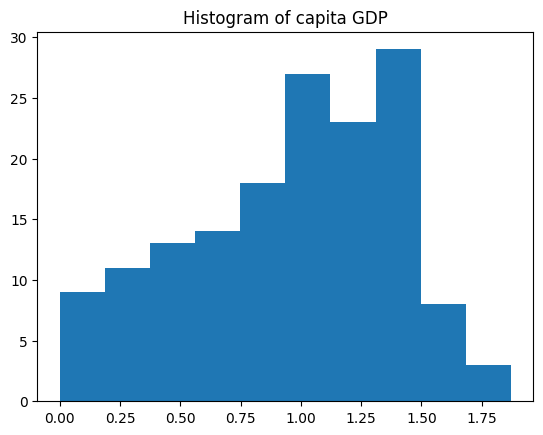

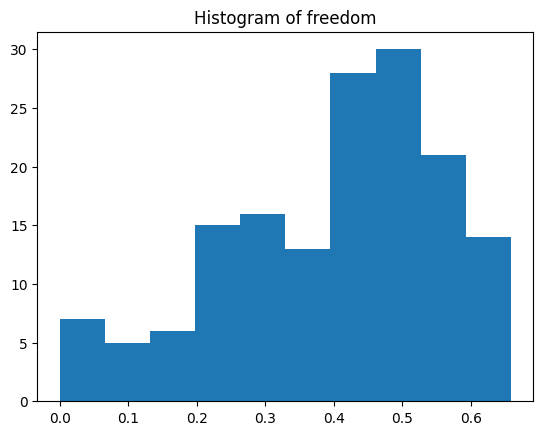

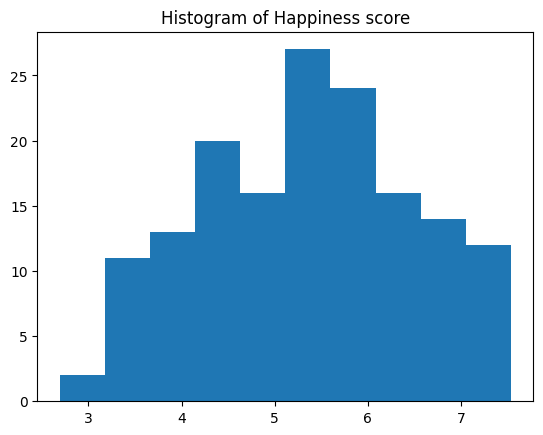

In [3]:
crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v3_world-happiness-report-2017.csv')

inputs, outputs = load_data(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

f1 = [ex[0] for ex in inputs]
f2 = [ex[1] for ex in inputs]
plot_histogram(f1, 'capita GDP')
plot_histogram(f2, 'freedom')
plot_histogram(outputs, 'Happiness score')

In [4]:
def plot3Ddata(x1_train, x2_train, y_train, x1_model=None, x2_model=None, y_model=None, x1_test=None, x2_test=None,
               y_test=None,
               title=None):
    ax = plt.axes(projection='3d')
    if x1_train:
        ax.scatter(x1_train, x2_train, y_train, c='r', marker='o', label='train data', s=10)
    if x1_model:
        ax.scatter(x1_model, x2_model, y_model, c='g', marker='_', label='learnt model')
    if x1_test:
        ax.scatter(x1_test, x2_test, y_test, c='purple', marker='^', label='test data')
    plt.title(title)
    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    plt.legend()
    plt.show()

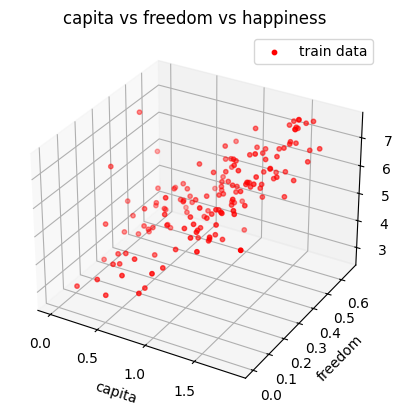

In [5]:
plot3Ddata(f1, f2, outputs, [], [], [], [], [], [], "capita vs freedom vs happiness")

In [6]:
def normalisation(train_data, test_data):
    scaler = MinMaxScaler()
    if not isinstance(train_data[0], list):
        train_data = [[d] for d in train_data]
        test_data = [[d] for d in test_data]

        scaler.fit(train_data)
        normalised_train_data = scaler.transform(train_data)
        normalised_test_data = scaler.transform(test_data)

        normalised_train_data = [el[0] for el in normalised_train_data]
        normalised_test_data = [el[0] for el in normalised_test_data]
    else:
        scaler.fit(train_data)
        normalised_train_data = scaler.transform(train_data)
        normalised_test_data = scaler.transform(test_data)

    return normalised_train_data, normalised_test_data

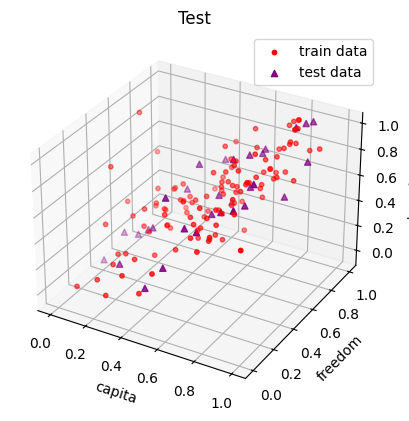

In [7]:
indexes = [i for i in range(len(inputs))]
train_sample = random.sample(indexes, k=int(0.8 * len(inputs)))
test_sample = [i for i in range(len(inputs)) if not i in train_sample]

train_input_data = [inputs[i] for i in train_sample]
train_output_data = [outputs[i] for i in train_sample]
test_input_data = [inputs[i] for i in test_sample]
test_output_data = [outputs[i] for i in test_sample]

train_input_data, test_input_data = normalisation(train_input_data, test_input_data)
train_output_data, test_output_data = normalisation(train_output_data, test_output_data)

f1_train = [t_data[0] for t_data in train_input_data]
f2_train = [t_data[1] for t_data in train_input_data]

f1_test = [t_test[0] for t_test in test_input_data]
f2_test = [t_test[1] for t_test in test_input_data]

plot3Ddata(f1_train, f2_train, train_output_data, [], [], [], f1_test, f2_test, test_output_data, "Test")

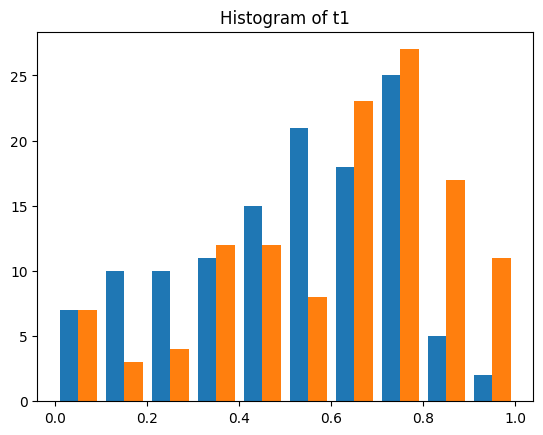

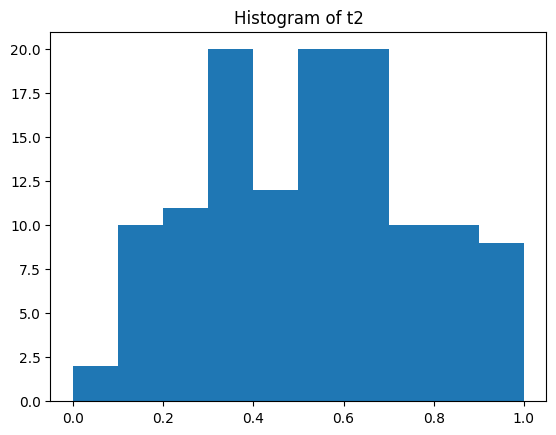

In [8]:
plot_histogram(train_input_data, "t1")
plot_histogram(train_output_data, "t2")

In [9]:
regressor = linear_model.LinearRegression()

regressor.fit(train_input_data, train_output_data)
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]

print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1 + ', w2, '* x2')

the learnt model: f(x) =  -0.014453568350820678  +  0.6453476934689735  * x1 +  0.3481765474616194 * x2


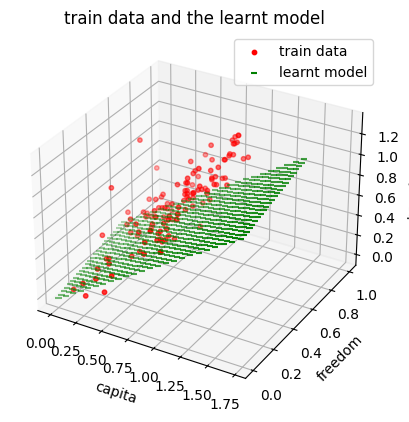

In [10]:
no_of_points = 25
xref = []
val = min(f1)
step = (max(f1) - val) / no_of_points
for i in range(1, no_of_points):
    for j in range(1, no_of_points):
        xref.append(val)
    val += step

xref2 = []
val = min(f2)
step = (max(f2) - val) / no_of_points
for i in range(1, no_of_points):
    aux = val
    for j in range(1, no_of_points):
        xref2.append(aux)
        aux += step

yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref, xref2)]
plot3Ddata(f1_train, f2_train, train_output_data, xref, xref2, yref, [], [], [], 'train data and the learnt model')

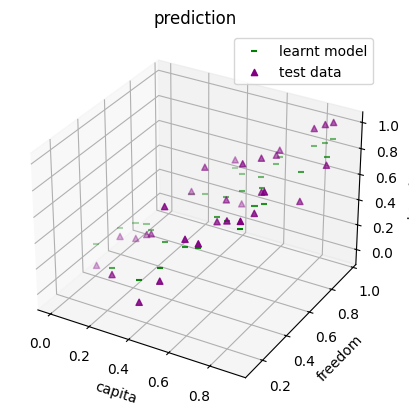

In [11]:
computed_test_outputs = regressor.predict(test_input_data)

plot3Ddata([], [], [], f1_test, f2_test, computed_test_outputs, f1_test, f2_test, test_output_data, "prediction")

In [12]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test_output_data, computed_test_outputs)
print('prediction error (tool):   ', error)

prediction error (tool):    0.015479602308504741
